In [6]:
# read all csv files in out folder
# For each file, read the csv file and place the value in the corresponding row

import os
import pandas as pd

# Define the folder path
folder_path = 'out'

# Define the column names
columns = ["Load R1CS", "Load Witness", "Setup", "Prover", "Verifier"]

# Create an empty dataframe with the defined column names
df = pd.DataFrame(columns=columns)

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        column = filename.split('-')[0]
        # find the number right before "exec" in the filename
        row = int(filename.split('exec')[0][-1])
        partition = int(filename.split('partitions')[0][-1])
        if row != partition:
            continue
        if "2cpu" not in filename:
            continue
        print(filename)
        # Read the csv file
        file_path = os.path.join(folder_path, filename)
        temp_df = pd.read_csv(file_path, header=None)


        if column == "Load R1CS" or column == "Load Witness":
            value = temp_df.iloc[-1,0]
        else:
            value = temp_df.iloc[-1,1]
        # Place the values
        df.loc[row, column] = value

df["Prover Total"] = df["Load R1CS"] + df["Load Witness"] + + df["Setup"] + df["Prover"]
print(df)

Load R1CS-1exec-2cpu-512mem-1partitions.csv
Load R1CS-2exec-2cpu-512mem-2partitions.csv
Load R1CS-3exec-2cpu-512mem-3partitions.csv
Load R1CS-4exec-2cpu-512mem-4partitions.csv
Load R1CS-5exec-2cpu-512mem-5partitions.csv
Load Witness-1exec-2cpu-512mem-1partitions.csv
Load Witness-2exec-2cpu-512mem-2partitions.csv
Load Witness-3exec-2cpu-512mem-3partitions.csv
Load Witness-4exec-2cpu-512mem-4partitions.csv
Load Witness-5exec-2cpu-512mem-5partitions.csv
Prover-1exec-2cpu-512mem-1partitions.csv
Prover-2exec-2cpu-512mem-2partitions.csv
Prover-3exec-2cpu-512mem-3partitions.csv
Prover-4exec-2cpu-512mem-4partitions.csv
Prover-5exec-2cpu-512mem-5partitions.csv
Setup-1exec-2cpu-512mem-1partitions.csv
Setup-2exec-2cpu-512mem-2partitions.csv
Setup-3exec-2cpu-512mem-3partitions.csv
Setup-4exec-2cpu-512mem-4partitions.csv
Setup-5exec-2cpu-512mem-5partitions.csv
Verifier-for--1exec-2cpu-512mem-1partitions.csv
Verifier-for--2exec-2cpu-512mem-2partitions.csv
Verifier-for--3exec-2cpu-512mem-3partitions.

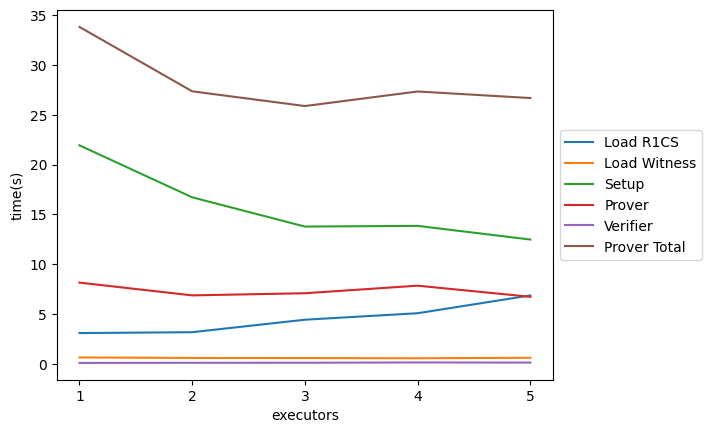

In [7]:
import matplotlib.pyplot as plt
df.index.name = 'executors'
# only integer number is allowed in xticks
ax = df.plot()
ax.locator_params(integer=True)
ax.set_ylabel("time(s)")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()